# LAB 4: Model overfitting. Tuning and evaluating Decision Trees with CV

The purpuse of this lab is to (a) illustrate model overfitting as presented in the lecture, and (b) train, tune (optimise) decision trees using grids of hyperparameter values and Cross Validation (CV), and to test the optimised model on the test dataset. Note that certain hyperparameters such as `max_depth` explained in the previous lab, prevent further growing a tree beyound a maximum number of levels. This is called pre-prunning, as explained in the last lecture, and is useful to prevent overfitting (among or together with other solutions). Other simple to use hyperparameters for pre-pruning are introduced in this lab notebook. 

The data provided in this folder comprise the training and test sonar datasets seen (and described) in the previous lab.  

## Tasks

1. Study the code with explanations and examples on clasification decision trees provided in this notebook. Run each cell and check the result. 

2. Define what overfitting is, and explain it using the chart with accuracies below on the synthetically generated data.  

3. For the Sonar dataset, experiment by modifying sets of values of hyperparameters in the grids and see what performances you get with the model optimisation, and how they compare to the already illustrated models.  

4. Other criteria for pre-pruning (concept explained in the last week's lecture related to stopping the growth of the tree to prevent overfitting), are defined in sklearn library by the hyperparamers called `min_samples_split`, and `min_samples_leaf`. 

    a) Check the exact meaning of these hyperparameters in the sklearn documentation (google sklearn DecisionTreeClassifier to find the specificaton of this class for decision trees). Compare and contrast the meanimngs of these 2 hyperparameters. If you are to use both hyperparameters when you grow a tree, based on their manings which one would you set to have a larger value than the other, and why? 
    
    b) Using the provided examples of grids for optimising decison tree models, build new grids using only one or both these hyperparameters min_samples_split, and min_samples_leaf, and see how your new models compare in accuracy with the previous models. 
    
    c) Repeat (b) but building grids with these two hyperparametrs and with the other hyperparameters combined in the same grid. You may opt for `RandomizedSearchCV` instead of `GridSearchCV` in this case since your grid grows substantually larger (see explanations below).

## Model Overfitting

To illustrate the problem of model overfitting, we consider a two-dimensional sunthetic dataset generated containing 1500 labeled instances, each of which is assigned to one of two classes, 0 or 1. Instances from each class are generated as follows:
1. Instances from class 1 are generated from a mixture of 3 Gaussian distributions, centered at [6,14], [10,6], and [14 14], respectively. 
2. Instances from class 0 are generated from a uniform distribution in a square region, whose sides have a length equals to 20.

For simplicity, both classes have equal number of labeled instances. The code for generating and plotting the data is shown below. All instances from class 1 are shown in red while those from class 0 are shown in black.

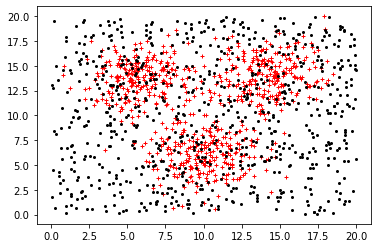

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

%matplotlib inline

N = 1500

mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]]  # diagonal covariance

np.random.seed(50)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=4)

In this example, we reserve 80% of the labeled data for training and the remaining 20% for testing. We then fit decision trees of different maximum depths (from 2 to 50) to the training set and plot their respective accuracies when applied to the training and test sets.


Text(0, 0.5, 'Accuracy')

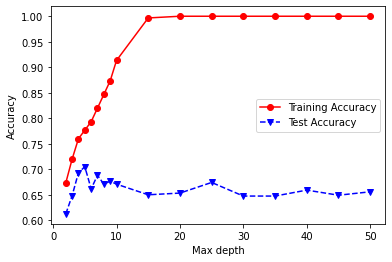

In [2]:
#########################################
# Training and Test set creation
#########################################

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

The plot above shows that training accuracy will continue to improve as the maximum depth of the tree increases (i.e., as the model becomes more complex). However, the test accuracy initially improves up to a maximum depth of 5, before it gradually decreases due to model overfitting.

## Tuning and evaluating decision trees on Sonar data

We use the train and test Sonar datsets that are provided in the folder made available with this notebook for this lab, to train/ fit decision trees and to tune/ optimise them, and to evaluate them on the test set. 


In [3]:
#Reading the train and test data 
#Note the header (names of variables) is inferred from the first line of the data files

import pandas as pd

data = pd.read_csv('sonar_train.csv',header='infer')
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A52,A53,A54,A55,A56,A57,A58,A59,A60,Class
0,0.0079,0.0086,0.0055,0.0250,0.0344,0.0546,0.0528,0.0958,0.1009,0.1240,...,0.0176,0.0127,0.0088,0.0098,0.0019,0.0059,0.0058,0.0059,0.0032,R
1,0.0599,0.0474,0.0498,0.0387,0.1026,0.0773,0.0853,0.0447,0.1094,0.0351,...,0.0013,0.0005,0.0227,0.0209,0.0081,0.0117,0.0114,0.0112,0.0100,M
2,0.0093,0.0269,0.0217,0.0339,0.0305,0.1172,0.1450,0.0638,0.0740,0.1360,...,0.0212,0.0091,0.0056,0.0086,0.0092,0.0070,0.0116,0.0060,0.0110,R
3,0.0151,0.0320,0.0599,0.1050,0.1163,0.1734,0.1679,0.1119,0.0889,0.1205,...,0.0061,0.0015,0.0084,0.0128,0.0054,0.0011,0.0019,0.0023,0.0062,R
4,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.0731,0.1249,0.1665,0.1496,0.1443,0.2770,0.2555,0.1712,0.0466,0.1114,...,0.0444,0.0230,0.0290,0.0141,0.0161,0.0177,0.0194,0.0207,0.0057,M
135,0.0516,0.0944,0.0622,0.0415,0.0995,0.2431,0.1777,0.2018,0.2611,0.1294,...,0.0432,0.0274,0.0152,0.0120,0.0129,0.0020,0.0109,0.0074,0.0078,M
136,0.0015,0.0186,0.0289,0.0195,0.0515,0.0817,0.1005,0.0124,0.1168,0.1476,...,0.0108,0.0075,0.0089,0.0036,0.0029,0.0013,0.0010,0.0032,0.0047,M
137,0.0411,0.0277,0.0604,0.0525,0.0489,0.0385,0.0611,0.1117,0.1237,0.2300,...,0.0217,0.0038,0.0019,0.0065,0.0132,0.0108,0.0050,0.0085,0.0044,M


Train a decidion tree model. Note the use of entropy impurity presented in class. 
Another impurity presented in the lectur is gini (default). 

In [4]:
from sklearn import tree

trainY = data['Class']
trainX = data.drop(['Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(trainX, trainY)

Next, suppose we apply the decision tree to classify the following test examples.

In [5]:
testData = pd.read_csv('sonar_test.csv',header='infer')

 
testData

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A52,A53,A54,A55,A56,A57,A58,A59,A60,Class
0,0.0125,0.0152,0.0218,0.0175,0.0362,0.0696,0.0873,0.0616,0.1252,0.1302,...,0.0041,0.0074,0.0030,0.0050,0.0048,0.0017,0.0041,0.0086,0.0058,R
1,0.0530,0.0885,0.1997,0.2604,0.3225,0.2247,0.0617,0.2287,0.0950,0.0740,...,0.0244,0.0199,0.0257,0.0082,0.0151,0.0171,0.0146,0.0134,0.0056,M
2,0.0368,0.0279,0.0103,0.0566,0.0759,0.0679,0.0970,0.1473,0.2164,0.2544,...,0.0105,0.0024,0.0018,0.0057,0.0092,0.0009,0.0086,0.0110,0.0052,M
3,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R
4,0.0216,0.0124,0.0174,0.0152,0.0608,0.1026,0.1139,0.0877,0.1160,0.0866,...,0.0052,0.0049,0.0096,0.0134,0.0122,0.0047,0.0018,0.0006,0.0023,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.0203,0.0121,0.0380,0.0128,0.0537,0.0874,0.1021,0.0852,0.1136,0.1747,...,0.0134,0.0094,0.0047,0.0045,0.0042,0.0028,0.0036,0.0013,0.0016,M
65,0.0117,0.0069,0.0279,0.0583,0.0915,0.1267,0.1577,0.1927,0.2361,0.2169,...,0.0053,0.0029,0.0020,0.0013,0.0029,0.0020,0.0062,0.0026,0.0052,M
66,0.0308,0.0339,0.0202,0.0889,0.1570,0.1750,0.0920,0.1353,0.1593,0.2795,...,0.0167,0.0127,0.0138,0.0090,0.0051,0.0029,0.0122,0.0056,0.0020,R
67,0.0526,0.0563,0.1219,0.1206,0.0246,0.1022,0.0539,0.0439,0.2291,0.1632,...,0.0339,0.0149,0.0335,0.0376,0.0174,0.0132,0.0103,0.0364,0.0208,M


We first extract the features and target class attributes from the test data and then apply the decision tree classifier to predict their classes. Then compute the accuracy. 

In [6]:
testY = testData['Class']
testX = testData.drop(['Class'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData['Class'],pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,Class,Predicted Class
0,R,M
1,M,M
2,M,M
3,R,R
4,R,R
...,...,...
64,M,R
65,M,M
66,R,R
67,M,M


In [7]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.74


The hyperparameters are the parameters of the model that you can optimise trying different values for them when you want to optimise your model; they cannnot be learned directly from data as it happens for the weights of a neural network which are learned by the backpropagation algorithm - these are simple parameters. 
We want now to see what tree's depth (`max_depth` hyperparameter) leads to a better accuracy. 
We shouldn't normally use the test set for searching for the best value of a hyperparameter, but the training and validation sets, or, if we don't have a validation set as in this case, just the training set.
This would be possible by doing a cross validation (CV) on the training set with tree max_depth varying in an interval 
2 to 20 (in the for loop) and choosing the value leading to the best accuracy in CV. 
In this illustration we use a 10-fold CV (see cv=10 in the code), within the `cross_val_score` function available from the `model_selection` module in sklearn library. The estimator is the decision tree model that we want to build, and the cross_val_score function computes the accuracy performance score for each fold (accuracy is also the default performance for classification decision trees). Google sklearn and  cross_val_score to access online the documentation for this function. 

Note that we do the CV in parallel on 4 threads (n_jobs=4). Note also that 1 processor's core can handle 2 threads in parallel, so if your processor has 4 cores (that's typical for common processsors), it can handle 8 threads. In the case of n_jobs=4 you use half of your processor power for the CV, and keep half for other tasks you may do while your analysis is running (and this is specially useful when your analysis is running for long and you still need to do other work like editing, email, etc, without your computer becomming too slow in responding to your comands; in such cases I typically use also n_jobs = 6, and so I employ 75% of the processor for the analysis and keep 25% to work comfortably on other common tasks). 
Below we illustrate a grid search for the best value of max_depth hyperparameter, implemented manually. 
In this case we say we tune or optimise the model (based on 1 hyperparameter here).

In [8]:
# the accuracy results may show slight different from running to running according to the data split in the CV
# but the best valuse would be around 0.74, 0.75

import numpy as np
import pandas as pd
from sklearn import tree 
from sklearn.model_selection import cross_val_score
from pprint import pprint

depth = []
acc=[]
for i in range(2,20):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    # Perform 10-fold cross validation in parallel on 4 threads, and append for each max_depth the average accuracy on the 10 folds to a list called depth
    scores = cross_val_score(estimator=clf, X=trainX, y=trainY, cv=10, scoring='accuracy', n_jobs=4)
    depth.append(i)
    acc.append(scores.mean())
print(list(zip(depth, acc)))

[(2, 0.6324175824175825), (3, 0.7203296703296702), (4, 0.6983516483516483), (5, 0.7351648351648351), (6, 0.734065934065934), (7, 0.7137362637362638), (8, 0.7208791208791209), (9, 0.7494505494505495), (10, 0.7197802197802197), (11, 0.7423076923076923), (12, 0.7494505494505495), (13, 0.7137362637362638), (14, 0.7203296703296703), (15, 0.7351648351648351), (16, 0.7494505494505493), (17, 0.7203296703296702), (18, 0.7137362637362638), (19, 0.7054945054945054)]


(0.5, 0.9)

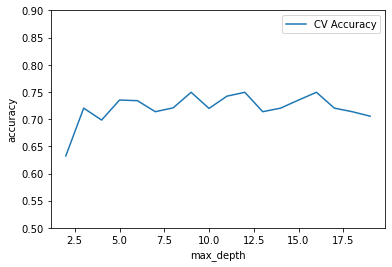

In [9]:
# visualise how accuracy on CV varies with the tree's max_depth
# the best values for accuracy would be around 0.74, 0.75, as we can see 

plt.plot(depth, acc)
plt.legend(['CV Accuracy'])
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.ylim((.5,.9))

A more compact way to search for the best hyperparameter value is using an automatic grid search, as seen below, using `GridSearchCV`, which explores all the combinations of hyperparameter values provided. Results might slightly differ from running to running because data is split on other points each time you run the code (see result slightly varying by hitting again the run button). 



In [10]:
# the accuracy results may be slightly different from running to running according to the data split in in the CV

import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV


parameters_grid = {'max_depth':range(2,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy'), parameters_grid, cv=10, n_jobs=4, scoring="accuracy")
clf.fit(X=trainX, y=trainY)
tree_model = clf.best_estimator_
print ('best accuracy and parameters are', clf.best_score_, clf.best_params_) 

best accuracy and parameters are 0.7494505494505495 {'max_depth': 16}


The above code tunes the model based on one hyper-parameter only (depth). But impurity (criterion as it is called in the coode) can also participate in the model tuning. The code below looks to a grid based of all the pairs of depth and 
impurities and chooses the best combination of such pairs in the ranges specified in `parameters_grid` below. Note that the best model is saved in 

In [15]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV


parameters_grid = {'max_depth':range(2,20), 'criterion':['gini', 'entropy']}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters_grid, cv=10, n_jobs=4, scoring="accuracy")
clf.fit(X=trainX, y=trainY)
best_tree_model = clf.best_estimator_
print ('best accuracy and parameters are', clf.best_score_, clf.best_params_) 

best accuracy and parameters are 0.7423076923076923 {'criterion': 'gini', 'max_depth': 10}


Finally, we evaluate accuracy of the best model on the test data. 

In [12]:
predY = best_tree_model.predict(testX)
predictions = pd.concat([testY, pd.Series(predY,name='PredictedClass')], axis=1)
predictions


,Class,PredictedClass
0,R,R
1,M,M
2,M,M
3,R,R
4,R,R
...,...,...
64,M,R
65,M,R
66,R,R
67,M,M


In [13]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 0.65


When the search grid is very large, it is impractical to evaluate the model on all the values combinations in the grid, especially when the model is computationally intensive and lasts long to train, or you have many hyperparameters in the grid, or many values. Instead of `GridSearchCV` in such situations, it is recimmended to use `RandomizedSearchCV` which does a similar thing, but explores only a limited number of random combinations of values of the hyperparameters, and this number of combination is specified in n_iter (number of iterations). Hopefully this can show combinations that seem to be better for the model and so you can further narrow down the search of optimal values in the areas of those values. You cna do this with a subsequent `GridSearchCV`, or another more area-focused `RandimizedSearchCV` if you still evalyate many values. The example below attempts 15 iterations (random combinations of pairs of values out of 18x2=36 in this example).

In [14]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV


parameters_grid = {'max_depth':range(2,20), 'criterion':['gini', 'entropy']}
clf = RandomizedSearchCV(tree.DecisionTreeClassifier(), parameters_grid, n_iter=15, cv=10, n_jobs=4, scoring='accuracy')
clf.fit(X=trainX, y=trainY)
best_tree_model = clf.best_estimator_
print ('best accuracy and parameters are', clf.best_score_, clf.best_params_) 

best accuracy and parameters are 0.7357142857142858 {'max_depth': 6, 'criterion': 'gini'}
